# Insurance cost prediction using linear regression

In this assignment we're going to use information like a person's age, sex, BMI, no. of children and smoking habit to predict the price of yearly medical bills. This kind of model is useful for insurance companies to determine the yearly insurance premium for a person. The dataset for this problem is taken from: https://www.kaggle.com/mirichoi0218/insurance


We will create a model with the following steps:
1. Download and explore the dataset
2. Prepare the dataset for training
3. Create a linear regression model
4. Train the model to fit the data
5. Make predictions using the trained model


This assignment builds upon the concepts from the first 2 lectures. It will help to review these Jupyter notebooks:
- PyTorch basics: https://jovian.ml/aakashns/01-pytorch-basics
- Linear Regression: https://jovian.ml/aakashns/02-linear-regression
- Logistic Regression: https://jovian.ml/aakashns/03-logistic-regression
- Linear regression (minimal): https://jovian.ml/aakashns/housing-linear-minimal
- Logistic regression (minimal): https://jovian.ml/aakashns/mnist-logistic-minimal

As you go through this notebook, you will find a **???** in certain places. Your job is to replace the **???** with appropriate code or values, to ensure that the notebook runs properly end-to-end . In some cases, you'll be required to choose some hyperparameters (learning rate, batch size etc.). Try to experiment with the hypeparameters to get the lowest loss.


In [1]:
# Uncomment and run the commands below if imports fail
# !conda install numpy pytorch torchvision cpuonly -c pytorch -y
# !pip install matplotlib --upgrade --quiet
!pip install jovian --upgrade --quiet

In [2]:
import torch
import jovian
import torchvision
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torchvision.datasets.utils import download_url
from torch.utils.data import DataLoader, TensorDataset, random_split

In [84]:
project_name='Assignment2-insurance-linear-regression' # will be used by jovian.commit

In [6]:
download_url

<function torchvision.datasets.utils.download_url(url, root, filename, md5)>

## Step 1: Download and explore the data

Let us begin by downloading the data. We'll use the `download_url` function from PyTorch to get the data as a CSV (comma-separated values) file. 

In [11]:
DATASET_URL = "https://hub.jovian.ml/wp-content/uploads/2020/05/insurance.csv"
insurance = "insurance.csv"
download_url(DATASET_URL, '.', insurance, 'md5')

To load the dataset into memory, we'll use the `read_csv` function from the `pandas` library. The data will be loaded as a Pandas dataframe. See this short tutorial to learn more: https://data36.com/pandas-tutorial-1-basics-reading-data-files-dataframes-data-selection/

In [194]:
dataframe_raw = pd.read_csv(insurance)
dataframe_raw.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


We're going to do a slight customization of the data, so that you every participant receives a slightly different version of the dataset. Fill in your name below as a string (enter at least 5 characters)

In [195]:
your_name = str('Bilgenur') # at least 5 characters

The `customize_dataset` function will customize the dataset slightly using your name as a source of random numbers.

In [196]:
def customize_dataset(dataframe_raw, rand_str):
    dataframe = dataframe_raw.copy(deep=True)
    # drop some rows
    dataframe = dataframe.sample(int(0.95*len(dataframe)), random_state=int(ord(rand_str[0])))
    # scale input
    dataframe.bmi = dataframe.bmi * ord(rand_str[1])/100.
    # scale target
    dataframe.charges = dataframe.charges * ord(rand_str[2])/100.
    # drop column
    if ord(rand_str[3]) % 2 == 1:
        dataframe = dataframe.drop(['region'], axis=1)
    return dataframe

In [197]:
dataframe = customize_dataset(dataframe_raw, your_name)
dataframe.head()

,age,sex,bmi,children,smoker,charges
397,21,male,32.57100,0,no,17913.417527
211,40,male,32.41875,4,no,8815.733550
304,57,female,39.90000,2,no,13657.903560
349,19,male,29.22675,0,no,1766.592342
733,48,female,28.62825,1,no,10203.030378


Let us answer some basic questions about the dataset. 


**Q: How many rows does the dataset have?**

In [198]:
num_rows = len(dataframe)
# or dataframe.shape[0]
print(num_rows)

1271


**Q: How many columns does the dataset have**

In [199]:
num_cols = dataframe.shape[1]
#or len(dataframe.columns)
print(num_cols)

6


**Q: What are the column titles of the input variables?**

In [201]:
input_cols = list(dataframe.columns.values)
input_cols.remove('charges')
print(input_cols)


['age', 'sex', 'bmi', 'children', 'smoker']


**Q: Which of the input columns are non-numeric or categorical variables ?**

Hint: `sex` is one of them. List the columns that are not numbers.

In [202]:
categorical_cols = list(dataframe.select_dtypes(include=['object']).columns.values)
categorical_cols

['sex', 'smoker']

**Q: What are the column titles of output/target variable(s)?**

In [203]:
output_cols = ['charges']
output_cols

['charges']

**Q: (Optional) What is the minimum, maximum and average value of the `charges` column? Can you show the distribution of values in a graph?**
Use this data visualization cheatsheet for referece: https://jovian.ml/aakashns/dataviz-cheatsheet

count     1271.000000
mean     14309.809169
std      13092.005378
min       1211.623812
25%       5107.322565
50%      10049.078052
75%      17908.709693
max      68872.062251
Name: charges, dtype: float64


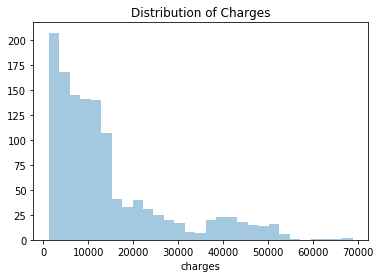

In [204]:
print(dataframe['charges'].describe())

# Write your answer here
# min value for charges column: 1211.623812
# max value for charges column: 68872.062251
# average (mean) value for charges column: 14309.809169

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

plt.title("Distribution of Charges")

sns.distplot(dataframe.charges, kde=False);
# does not like a normal distribution. If it was normal distribution , it would be ideal to use MSE as loss function

Remember to commit your notebook to Jovian after every step, so that you don't lose your work.

In [205]:
jovian.commit(project=project_name, environment=None)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "bbaloglu/assignment2-insurance-linear-regression" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Committed successfully! https://jovian.ml/bbaloglu/assignment2-insurance-linear-regression


'https://jovian.ml/bbaloglu/assignment2-insurance-linear-regression'

## Step 2: Prepare the dataset for training

We need to convert the data from the Pandas dataframe into a PyTorch tensors for training. To do this, the first step is to convert it numpy arrays. If you've filled out `input_cols`, `categorial_cols` and `output_cols` correctly, this following function will perform the conversion to numpy arrays.

In [206]:
def dataframe_to_arrays(dataframe):
    # Make a copy of the original dataframe
    dataframe1 = dataframe.copy(deep=True)
    # Convert non-numeric categorical columns to numbers
    for col in categorical_cols:
        dataframe1[col] = dataframe1[col].astype('category').cat.codes
    # Extract input & outputs as numpy arrays
    inputs_array = dataframe1[input_cols].to_numpy()
    targets_array = dataframe1[output_cols].to_numpy()
    return inputs_array, targets_array

Read through the [Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html) to understand how we're converting categorical variables into numbers.

In [207]:
inputs_array, targets_array = dataframe_to_arrays(dataframe)
inputs_array, targets_array 

(array([[21.     ,  1.     , 32.571  ,  0.     ,  0.     ],
        [40.     ,  1.     , 32.41875,  4.     ,  0.     ],
        [57.     ,  0.     , 39.9    ,  2.     ,  0.     ],
        ...,
        [19.     ,  0.     , 27.03225,  1.     ,  0.     ],
        [62.     ,  0.     , 26.25   ,  0.     ,  0.     ],
        [46.     ,  1.     , 46.0845 ,  3.     ,  0.     ]]),
 array([[17913.4175268],
        [ 8815.73355  ],
        [13657.90356  ],
        ...,
        [ 2927.694834 ],
        [14527.21176  ],
        [ 9659.644308 ]]))

**Q: Convert the numpy arrays `inputs_array` and `targets_array` into PyTorch tensors. Make sure that the data type is `torch.float32`.**

In [208]:
inputs = torch.from_numpy(inputs_array)
targets = torch.from_numpy(targets_array)
inputs, targets = inputs.type(torch.float32),targets.type(torch.float32)

print(inputs)
print(targets)

tensor([[21.0000,  1.0000, 32.5710,  0.0000,  0.0000],
        [40.0000,  1.0000, 32.4188,  4.0000,  0.0000],
        [57.0000,  0.0000, 39.9000,  2.0000,  0.0000],
        ...,
        [19.0000,  0.0000, 27.0322,  1.0000,  0.0000],
        [62.0000,  0.0000, 26.2500,  0.0000,  0.0000],
        [46.0000,  1.0000, 46.0845,  3.0000,  0.0000]])
tensor([[17913.4180],
        [ 8815.7334],
        [13657.9033],
        ...,
        [ 2927.6948],
        [14527.2119],
        [ 9659.6445]])


In [209]:
inputs.dtype, targets.dtype

(torch.float32, torch.float32)

Next, we need to create PyTorch datasets & data loaders for training & validation. We'll start by creating a `TensorDataset`.

In [210]:
dataset = TensorDataset(inputs, targets)

In [211]:
len(dataset)

1271

**Q: Pick a number between `0.1` and `0.2` to determine the fraction of data that will be used for creating the validation set. Then use `random_split` to create training & validation datasets. **

In [212]:
val_percent = 0.15 # between 0.1 and 0.2
val_size = int(num_rows * val_percent)
train_size = num_rows - val_size

from torch.utils.data import random_split
train_ds, val_ds = random_split(dataset, [train_size, val_size]) # Use the random_split function to split dataset into 2 parts of the desired length
len(train_ds), len(val_ds)

(1081, 190)

Finally, we can create data loaders for training & validation.

**Q: Pick a batch size for the data loader.**

In [213]:
batch_size = 64

In [214]:
train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

Let's look at a batch of data to verify everything is working fine so far.

In [215]:
for xb, yb in train_loader:
    print("inputs:", xb)
    print("targets:", yb)
    break

inputs: tensor([[18.0000,  0.0000, 25.2945,  1.0000,  0.0000],
        [59.0000,  1.0000, 31.1850,  2.0000,  0.0000],
        [23.0000,  1.0000, 19.6507,  0.0000,  0.0000],
        [43.0000,  0.0000, 26.5335,  1.0000,  1.0000],
        [34.0000,  0.0000, 33.5160,  1.0000,  1.0000],
        [49.0000,  1.0000, 32.9175,  1.0000,  0.0000],
        [51.0000,  0.0000, 42.6930,  0.0000,  0.0000],
        [43.0000,  1.0000, 37.7685,  3.0000,  1.0000],
        [50.0000,  0.0000, 29.2215,  3.0000,  0.0000],
        [46.0000,  0.0000, 37.3065,  0.0000,  1.0000],
        [31.0000,  0.0000, 32.0197,  3.0000,  0.0000],
        [35.0000,  1.0000, 25.6410,  3.0000,  1.0000],
        [18.0000,  0.0000, 44.3520,  0.0000,  1.0000],
        [61.0000,  1.0000, 35.6107,  0.0000,  0.0000],
        [18.0000,  1.0000, 22.5435,  0.0000,  0.0000],
        [26.0000,  0.0000, 35.9100,  2.0000,  0.0000],
        [24.0000,  1.0000, 24.8377,  0.0000,  0.0000],
        [48.0000,  1.0000, 29.4000,  1.0000,  1.0000],
  

Let's save our work by committing to Jovian.

In [192]:
jovian.commit(project=project_name, environment=None)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "bbaloglu/assignment2-insurance-linear-regression" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Committed successfully! https://jovian.ml/bbaloglu/assignment2-insurance-linear-regression


'https://jovian.ml/bbaloglu/assignment2-insurance-linear-regression'

## Step 3: Create a Linear Regression Model

Our model itself is a fairly straightforward linear regression (we'll build more complex models in the next assignment). 


In [216]:
input_size = len(input_cols)
output_size = len(output_cols)
print(input_size)
print(output_size)

5
1


**Q: Complete the class definition below by filling out the constructor (`__init__`), `forward`, `training_step` and `validation_step` methods.**

Hint: Think carefully about picking a good loss fuction (it's not cross entropy). Maybe try 2-3 of them and see which one works best. See https://pytorch.org/docs/stable/nn.functional.html#loss-functions

For my loss function, I decided to use the L1 loss function also known as the mean absolute loss because it handles outliers very well. The other loss function that is used for regression problems is the L2 loss function or the mean squared loss. Depending on the distribution of your data and whether or not it’s transformed to handle outliers, using one or the other will have a significant impact on your loss and model. Since I did not transform my data to account for possible outliers and the histogram suggests many outliers in the charges, I think it would be better to use the L1 loss function in this case. It is also worth nothing that the L1 loss function converges to an undefined minimum because the function is not differentiable at the minimum. The L2 loss function however, is a convex function, and converges to a minimum making it a very good loss function but models are penalized if the data is ‘noisy.’

In [225]:
class InsuranceModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size) # fill this (hint: use input_size & output_size defined above)
        
    def forward(self, xb):
        out = self.linear(xb)                          # fill this
        return out
    
    def training_step(self, batch):
        inputs, targets = batch 
        # Generate predictions
        out = self(inputs)          
        # Calculate loss
        loss = F.l1_loss(out, targets)                         # fill this
        return loss
    
    def validation_step(self, batch):
        inputs, targets = batch
        # Generate predictions
        out = self(inputs)
        # Calculate loss
        loss = F.l1_loss(out, targets)                          # fill this    
        return {'val_loss': loss.detach()}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        return {'val_loss': epoch_loss.item()}
    
    def epoch_end(self, epoch, result, num_epochs):
        # Print result every 20th epoch
        if (epoch+1) % 20 == 0 or epoch == num_epochs-1:
            print("Epoch [{}], val_loss: {:.4f}".format(epoch+1, result['val_loss']))

Let us create a model using the `InsuranceModel` class. You may need to come back later and re-run the next cell to reinitialize the model, in case the loss becomes `nan` or `infinity`.

In [226]:
model = InsuranceModel()

Let's check out the weights and biases of the model using `model.parameters`.

In [227]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.4113, -0.1363,  0.0614, -0.3721,  0.2951]], requires_grad=True),
 Parameter containing:
 tensor([0.3017], requires_grad=True)]

One final commit before we train the model.

In [228]:
jovian.commit(project=project_name, environment=None)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "bbaloglu/assignment2-insurance-linear-regression" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Committed successfully! https://jovian.ml/bbaloglu/assignment2-insurance-linear-regression


'https://jovian.ml/bbaloglu/assignment2-insurance-linear-regression'

## Step 4: Train the model to fit the data

To train our model, we'll use the same `fit` function explained in the lecture. That's the benefit of defining a generic training loop - you can use it for any problem.

In [229]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result, epochs)
        history.append(result)
    return history

**Q: Use the `evaluate` function to calculate the loss on the validation set before training.**

In [231]:
result = evaluate(model, val_loader) # Use the the evaluate function
print(result) #a very high loss

{'val_loss': 14860.5029296875}



We are now ready to train the model. You may need to run the training loop many times, for different number of epochs and with different learning rates, to get a good result. Also, if your loss becomes too large (or `nan`), you may have to re-initialize the model by running the cell `model = InsuranceModel()`. Experiment with this for a while, and try to get to as low a loss as possible.

**Q: Train the model 4-5 times with different learning rates & for different number of epochs.**

Hint: Vary learning rates by orders of 10 (e.g. `1e-2`, `1e-3`, `1e-4`, `1e-5`, `1e-6`) to figure out what works.

In [232]:
epochs = 1000
lr = 1e-2
history1 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [20], val_loss: 8829.8223
Epoch [40], val_loss: 8247.0439
Epoch [60], val_loss: 8202.6182
Epoch [80], val_loss: 8159.8892
Epoch [100], val_loss: 8117.4878
Epoch [120], val_loss: 8074.4985
Epoch [140], val_loss: 8038.0669
Epoch [160], val_loss: 8003.8418
Epoch [180], val_loss: 7970.1934
Epoch [200], val_loss: 7937.9102
Epoch [220], val_loss: 7908.0454
Epoch [240], val_loss: 7878.1323
Epoch [260], val_loss: 7852.2056
Epoch [280], val_loss: 7829.4126
Epoch [300], val_loss: 7810.4341
Epoch [320], val_loss: 7791.3384
Epoch [340], val_loss: 7776.1641
Epoch [360], val_loss: 7766.2563
Epoch [380], val_loss: 7760.0923
Epoch [400], val_loss: 7756.0410
Epoch [420], val_loss: 7755.1172
Epoch [440], val_loss: 7754.3335
Epoch [460], val_loss: 7754.5493
Epoch [480], val_loss: 7755.4946
Epoch [500], val_loss: 7756.2480
Epoch [520], val_loss: 7756.7964
Epoch [540], val_loss: 7757.7017
Epoch [560], val_loss: 7758.6055
Epoch [580], val_loss: 7759.3696
Epoch [600], val_loss: 7759.9180
Epoch [620], v

In [234]:
epochs = 1000
lr = 1e-3
history2 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [20], val_loss: 7756.6055
Epoch [40], val_loss: 7756.5728
Epoch [60], val_loss: 7756.5522
Epoch [80], val_loss: 7756.5215
Epoch [100], val_loss: 7756.4941
Epoch [120], val_loss: 7756.4634
Epoch [140], val_loss: 7756.4380
Epoch [160], val_loss: 7756.4062
Epoch [180], val_loss: 7756.3809
Epoch [200], val_loss: 7756.3516
Epoch [220], val_loss: 7756.3228
Epoch [240], val_loss: 7756.3008
Epoch [260], val_loss: 7756.2715
Epoch [280], val_loss: 7756.2417
Epoch [300], val_loss: 7756.2153
Epoch [320], val_loss: 7756.1841
Epoch [340], val_loss: 7756.1558
Epoch [360], val_loss: 7756.1284
Epoch [380], val_loss: 7756.0962
Epoch [400], val_loss: 7756.0688
Epoch [420], val_loss: 7756.0405
Epoch [440], val_loss: 7756.0103
Epoch [460], val_loss: 7755.9810
Epoch [480], val_loss: 7755.9512
Epoch [500], val_loss: 7755.9214
Epoch [520], val_loss: 7755.8945
Epoch [540], val_loss: 7755.8638
Epoch [560], val_loss: 7755.8345
Epoch [580], val_loss: 7755.8071
Epoch [600], val_loss: 7755.7778
Epoch [620], v

In [235]:
epochs = 1000
lr = 1e-4
history3 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [20], val_loss: 7755.1992
Epoch [40], val_loss: 7755.1968
Epoch [60], val_loss: 7755.1948
Epoch [80], val_loss: 7755.1909
Epoch [100], val_loss: 7755.1880
Epoch [120], val_loss: 7755.1870
Epoch [140], val_loss: 7755.1836
Epoch [160], val_loss: 7755.1812
Epoch [180], val_loss: 7755.1782
Epoch [200], val_loss: 7755.1763
Epoch [220], val_loss: 7755.1738
Epoch [240], val_loss: 7755.1714
Epoch [260], val_loss: 7755.1680
Epoch [280], val_loss: 7755.1665
Epoch [300], val_loss: 7755.1641
Epoch [320], val_loss: 7755.1606
Epoch [340], val_loss: 7755.1582
Epoch [360], val_loss: 7755.1558
Epoch [380], val_loss: 7755.1538
Epoch [400], val_loss: 7755.1523
Epoch [420], val_loss: 7755.1484
Epoch [440], val_loss: 7755.1450
Epoch [460], val_loss: 7755.1421
Epoch [480], val_loss: 7755.1401
Epoch [500], val_loss: 7755.1372
Epoch [520], val_loss: 7755.1353
Epoch [540], val_loss: 7755.1328
Epoch [560], val_loss: 7755.1294
Epoch [580], val_loss: 7755.1270
Epoch [600], val_loss: 7755.1245
Epoch [620], v

In [236]:
epochs = 1000
lr = 1e-4
history4 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [20], val_loss: 7755.0688
Epoch [40], val_loss: 7755.0664
Epoch [60], val_loss: 7755.0645
Epoch [80], val_loss: 7755.0620
Epoch [100], val_loss: 7755.0591
Epoch [120], val_loss: 7755.0566
Epoch [140], val_loss: 7755.0542
Epoch [160], val_loss: 7755.0508
Epoch [180], val_loss: 7755.0483
Epoch [200], val_loss: 7755.0454
Epoch [220], val_loss: 7755.0435
Epoch [240], val_loss: 7755.0410
Epoch [260], val_loss: 7755.0376
Epoch [280], val_loss: 7755.0337
Epoch [300], val_loss: 7755.0327
Epoch [320], val_loss: 7755.0298
Epoch [340], val_loss: 7755.0273
Epoch [360], val_loss: 7755.0234
Epoch [380], val_loss: 7755.0210
Epoch [400], val_loss: 7755.0190
Epoch [420], val_loss: 7755.0156
Epoch [440], val_loss: 7755.0132
Epoch [460], val_loss: 7755.0098
Epoch [480], val_loss: 7755.0073
Epoch [500], val_loss: 7755.0054
Epoch [520], val_loss: 7755.0015
Epoch [540], val_loss: 7754.9985
Epoch [560], val_loss: 7754.9961
Epoch [580], val_loss: 7754.9937
Epoch [600], val_loss: 7754.9907
Epoch [620], v

In [237]:
epochs = 1000
lr = 1e-5
history5 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [20], val_loss: 7754.9336
Epoch [40], val_loss: 7754.9341
Epoch [60], val_loss: 7754.9336
Epoch [80], val_loss: 7754.9336
Epoch [100], val_loss: 7754.9331
Epoch [120], val_loss: 7754.9321
Epoch [140], val_loss: 7754.9321
Epoch [160], val_loss: 7754.9321
Epoch [180], val_loss: 7754.9316
Epoch [200], val_loss: 7754.9312
Epoch [220], val_loss: 7754.9312
Epoch [240], val_loss: 7754.9316
Epoch [260], val_loss: 7754.9312
Epoch [280], val_loss: 7754.9312
Epoch [300], val_loss: 7754.9302
Epoch [320], val_loss: 7754.9312
Epoch [340], val_loss: 7754.9292
Epoch [360], val_loss: 7754.9297
Epoch [380], val_loss: 7754.9292
Epoch [400], val_loss: 7754.9292
Epoch [420], val_loss: 7754.9297
Epoch [440], val_loss: 7754.9297
Epoch [460], val_loss: 7754.9292
Epoch [480], val_loss: 7754.9277
Epoch [500], val_loss: 7754.9277
Epoch [520], val_loss: 7754.9272
Epoch [540], val_loss: 7754.9272
Epoch [560], val_loss: 7754.9272
Epoch [580], val_loss: 7754.9272
Epoch [600], val_loss: 7754.9263
Epoch [620], v

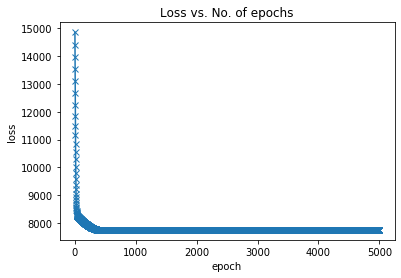

In [240]:
# Replace these values with your results
history = [result] + history1 + history2 + history3 + history4 + history5
accuracies = [result['val_loss'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Loss vs. No. of epochs');

#looks like we found the optimal loss

**Q: What is the final validation loss of your model?**

In [241]:
val_loss = 7754.9204

Let's log the final validation loss to Jovian and commit the notebook

In [242]:
jovian.log_metrics(val_loss=val_loss)

[jovian] Metrics logged.


In [243]:
jovian.commit(project=project_name, environment=None)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "bbaloglu/assignment2-insurance-linear-regression" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Attaching records (metrics, hyperparameters, dataset etc.)
[jovian] Committed successfully! https://jovian.ml/bbaloglu/assignment2-insurance-linear-regression


'https://jovian.ml/bbaloglu/assignment2-insurance-linear-regression'

Now scroll back up, re-initialize the model, and try different set of values for batch size, number of epochs, learning rate etc. Commit each experiment and use the "Compare" and "View Diff" options on Jovian to compare the different results.

## Step 5: Make predictions using the trained model

**Q: Complete the following function definition to make predictions on a single input**

In [244]:
def predict_single(input, target, model):
    inputs = input.unsqueeze(0)
    predictions = model(inputs)               # fill this
    prediction = predictions[0].detach()
    print("Input:", input)
    print("Target:", target)
    print("Prediction:", prediction)

In [245]:
input, target = val_ds[0]
predict_single(input, target, model)

Input: tensor([22.0000,  1.0000, 37.3800,  0.0000,  1.0000])
Target: tensor([38432.4219])
Prediction: tensor([2865.2869])


In [246]:
input, target = val_ds[10]
predict_single(input, target, model)

Input: tensor([46.0000,  1.0000, 44.4675,  3.0000,  1.0000])
Target: tensor([49843.2148])
Prediction: tensor([9043.4248])


In [249]:
input, target = val_ds[23]
predict_single(input, target, model)

Input: tensor([35.0000,  0.0000, 37.6058,  1.0000,  0.0000])
Target: tensor([6080.8945])
Prediction: tensor([6463.4727])


In [251]:
input, target = val_ds[40]
predict_single(input, target, model)

Input: tensor([56.0000,  0.0000, 26.9325,  0.0000,  0.0000])
Target: tensor([12370.3428])
Prediction: tensor([13157.9590])


Are you happy with your model's predictions? Try to improve them further.

## (Optional) Step 6: Try another dataset & blog about it

While this last step is optional for the submission of your assignment, we highly recommend that you do it. Try to clean up & replicate this notebook (or [this one](https://jovian.ml/aakashns/housing-linear-minimal), or [this one](https://jovian.ml/aakashns/mnist-logistic-minimal) ) for a different linear regression or logistic regression problem. This will help solidify your understanding, and give you a chance to differentiate the generic patters in machine learning from problem-specific details.

Here are some sources to find good datasets:

- https://lionbridge.ai/datasets/10-open-datasets-for-linear-regression/
- https://www.kaggle.com/rtatman/datasets-for-regression-analysis
- https://archive.ics.uci.edu/ml/datasets.php?format=&task=reg&att=&area=&numAtt=&numIns=&type=&sort=nameUp&view=table
- https://people.sc.fsu.edu/~jburkardt/datasets/regression/regression.html
- https://archive.ics.uci.edu/ml/datasets/wine+quality
- https://pytorch.org/docs/stable/torchvision/datasets.html

We also recommend that you write a blog about your approach to the problem. Here is a suggested structure for your post (feel free to experiment with it):

- Interesting title & subtitle
- Overview of what the blog covers (which dataset, linear regression or logistic regression, intro to PyTorch)
- Downloading & exploring the data
- Preparing the data for training
- Creating a model using PyTorch
- Training the model to fit the data
- Your thoughts on how to experiment with different hyperparmeters to reduce loss
- Making predictions using the model

As with the previous assignment, you can [embed Juptyer notebook cells & outputs from Jovian](https://medium.com/jovianml/share-and-embed-jupyter-notebooks-online-with-jovian-ml-df709a03064e) into your blog. 

Don't forget to share your work on the forum: https://jovian.ml/forum/t/share-your-work-here-assignment-2/4931

In [250]:
jovian.commit(project=project_name, environment=None)
jovian.commit(project=project_name, environment=None) # try again, kaggle fails sometimes

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "bbaloglu/assignment2-insurance-linear-regression" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Attaching records (metrics, hyperparameters, dataset etc.)
[jovian] Committed successfully! https://jovian.ml/bbaloglu/assignment2-insurance-linear-regression


<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "bbaloglu/assignment2-insurance-linear-regression" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Attaching records (metrics, hyperparameters, dataset etc.)
[jovian] Committed successfully! https://jovian.ml/bbaloglu/assignment2-insurance-linear-regression


'https://jovian.ml/bbaloglu/assignment2-insurance-linear-regression'